<a href="https://colab.research.google.com/github/rohansangal1/Brain-Tumor-Classification/blob/main/Rohan_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

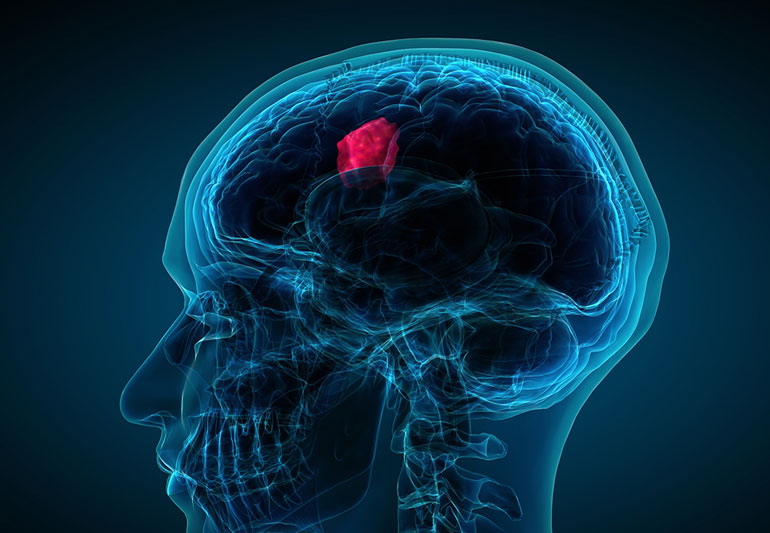

# **Brain Tumor Classification**

In the United States, there are over 200,000 cases of brain tumors yearly, putting it in the **Common** category, and worldwide, over 251,329 people died from them in 2020.

When Brain Tumors are left untreated, they grow more, which also leads to more aggressive effects such as seizures, dramatic changes in blood pressure, and extreme brain damage, eventually leading to death which can occur within a time span as low as 3-4 months.

In this project, Brain Tumor MRI images will be used to diganose and classify brain tumors. 

The importance of this is early detection and classification of brain tumors can help in selecting the best treatments to save the lives of many patients.

The dataset that will be used contains over 7000 images that are in one of four classes, which are Glioma, Notumor, Meningioma, and Pituitary.


*   Glioma - A tumor that forms when glial cells grow out of control.

*   Notumor - No tumor is present in the brain.

*   Meningioma - A usually noncancerous tumor that arises from the membranes surrounding the brain and spinal cord.

*   Pituitary - A tumor that forms in the pituitary gland near the brain that can cause changes in hormone levels in the body.

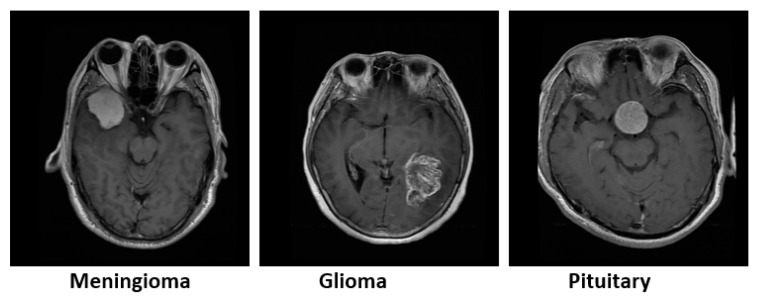

In [ ]:
#@title Importing Libraries and Dataset { display-mode: "form" }

import os
import math
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance
from tqdm import tqdm
import random
import cv2
import pandas as pd
import seaborn as sns
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score
from keras.metrics import SparseCategoricalCrossentropy
from keras.layers import Dense, Conv2D, InputLayer, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Reshape
from sklearn import model_selection
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from skimage import color
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import cohen_kappa_score
from keras.applications.mobilenet import MobileNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

#Uploading kaggle.json 
from google.colab import files
files.upload()


# downloading dataset directly into notebook from kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
# labels
labels = {'glioma':0,'notumor':1,'meningioma':2,'pituitary':3}

In [ ]:
labels

{'glioma': 0, 'notumor': 1, 'meningioma': 2, 'pituitary': 3}

In [ ]:
!ls

brain-tumor-mri-dataset.zip  kaggle.json  sample_data  Testing	Training


In [ ]:
# os.chdir will help switch between Training and Testing Files for the next few sections
os.chdir('/content/Testing')

In [ ]:
# Good for making sure the directory has changed
!ls

glioma	meningioma  notumor  pituitary


# **Counting Images Within Each Class**

This will help to see if there is any imbalances in the dataset since an imbalanced data can lead to bias and low accuracy models.

In [ ]:
# function that counts images in each class
def count_files(dir_path):
  count = 0
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
  return count





In [ ]:
# counting the number of images in each class in the Training Set

print("This is the testing set")

dir_path = r"meningioma"
meningioma_count = count_files(dir_path)
print("meningioma: ",meningioma_count)

dir_path = r"glioma"
glioma_count = count_files(dir_path)
print("glioma: ", glioma_count)

dir_path = r"notumor"
notumor_count = count_files(dir_path)
print("notumor: ", notumor_count)

dir_path = r"pituitary"
pituitary_count = count_files(dir_path)
print("pituitary: ",pituitary_count)

This is the testing set
meningioma:  306
glioma:  300
notumor:  405
pituitary:  300


In [ ]:
# Creating dataframe for our classes in testing data

d = {'class': ['meningioma', 'glioma', 'notumor' , 'pituitary' ], 'count' : [meningioma_count, 
                                                                              glioma_count,
                                                                              notumor_count, 
                                                                              pituitary_count]}
df = pd.DataFrame(data=d)

In [ ]:
df.head()

,class,count
0,meningioma,306
1,glioma,300
2,notumor,405
3,pituitary,300


In [ ]:
os.chdir('/content/Training')

In [ ]:
# counting the number of images in each class in the Training Set

print("This is the training set")

dir_path = r"meningioma"
meningioma_count = count_files(dir_path)
print("meningioma: ", meningioma_count)

dir_path = r"glioma"
glioma_count = count_files(dir_path)
print("glioma: ", glioma_count)

dir_path = r"notumor"
notumor_count = count_files(dir_path)
print("notumor: ", notumor_count)

dir_path = r"pituitary"
pituitary_count = count_files(dir_path)
print("pituitary: ", pituitary_count)

This is the training set
meningioma:  1339
glioma:  1321
notumor:  1595
pituitary:  1457


In [ ]:
# Creating dataframe for classes in training data
d = {'class': ['meningioma', 'glioma', 'notumor' , 'pituitary' ], 'count' : [meningioma_count, 
                                                                              glioma_count,
                                                                              notumor_count, 
                                                                              pituitary_count]}
df = pd.DataFrame(data=d)

In [ ]:
df.head()

,class,count
0,meningioma,1339
1,glioma,1321
2,notumor,1595
3,pituitary,1457


# **Plotting the Number of Images in each Class for Testing and Training Data**

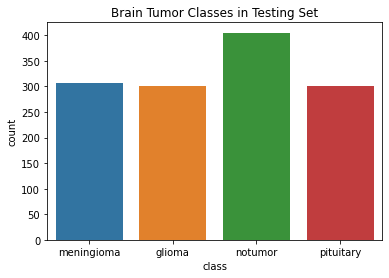

In [ ]:
# Using seaborn to create a barplot to plot the number of images within each of the classes in Testing Set
sns.barplot(x="class", y='count', data=df).set(title="Brain Tumor Classes in Testing Set");

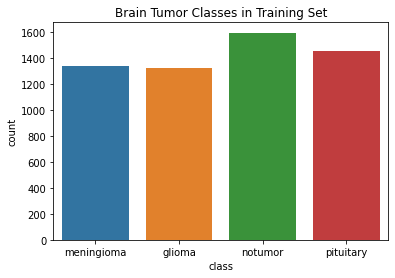

In [ ]:
# # Using seaborn to create a barplot to plot the number of images within each of the classes in Training set
sns.barplot(x="class", y='count', data=df).set(title="Brain Tumor Classes in Training Set");

After looking at both the testing and training counts, notumor has quite a few more images than the other classes which could potentially lead to bias. Other than this, the other classes are well balanced which will help with having high accuracy models.

# **Displaying Testing Images🖼**

Now it's time to see what the images in the dataset looks like. This will help with understanding how each image will be classified into their respective class.

Glioma Testing Image: 


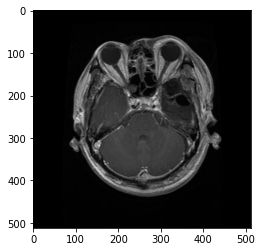

In [ ]:
# Displaying glioma image

glioma_img = "/content/Testing/glioma/Te-gl_0011.jpg"
print("Glioma Testing Image: ")
glioma_img = cv2.imread(glioma_img)
plt.imshow(glioma_img);

Meningioma Testing Image: 


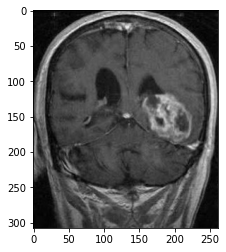

In [ ]:
# Displaying meningioma image

meningioma_img = "/content/Testing/meningioma/Te-meTr_0007.jpg"
print("Meningioma Testing Image: ")
meningioma_img = cv2.imread(meningioma_img)

notumor Testing Image: 


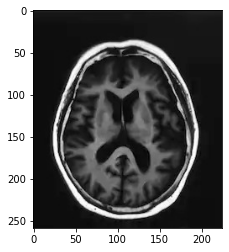

In [ ]:
# displaying notumor image

notumor_img = "/content/Testing/notumor/Te-noTr_0003.jpg"
print("notumor Testing Image: ")
notumor_img = cv2.imread(notumor_img)
plt.imshow(notumor_img);

Pituitary Testing Image: 


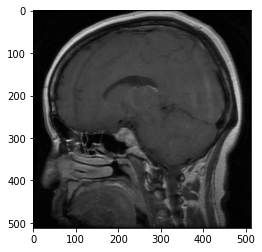

In [ ]:
# displaying pituitary image

pituitary_img = "/content/Testing/pituitary/Te-piTr_0004.jpg"
print("Pituitary Testing Image: ")
pituitary_img = cv2.imread(pituitary_img) 
plt.imshow(pituitary_img);

# **Displaying Training Images🖼**

In [ ]:
os.chdir('/content/Training')

Meningioma Training Image: 


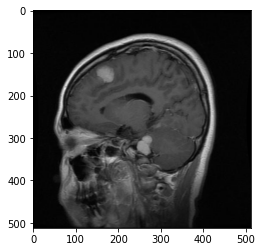

In [ ]:
img = "meningioma/Tr-me_0560.jpg"
img = cv2.imread(img)
print("Meningioma Training Image: ")
plt.imshow(img);

Glioma Training Image: 


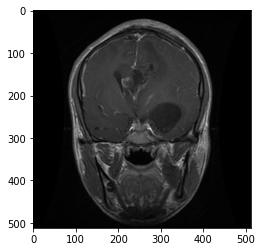

In [ ]:
img = "/content/Training/glioma/Tr-glTr_0005.jpg"
img = cv2.imread(img)
print("Glioma Training Image: ")
plt.imshow(img);

notumor Training Image: 


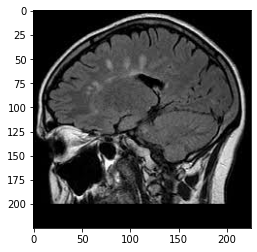

In [ ]:
img = "/content/Training/notumor/Tr-noTr_0008.jpg"
img = cv2.imread(img) # reads image
print("notumor Training Image: ")
plt.imshow(img);

Pituitary Training Image: 


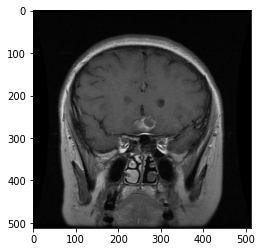

In [ ]:
img = "/content/Training/pituitary/Tr-piTr_0009.jpg"
img = cv2.imread(img)
print("Pituitary Training Image: ")
plt.imshow(img);

In [ ]:
print("Image Dimensions:",img.shape)

Image Dimensions: (512, 512, 3)


notumor Training Image: 


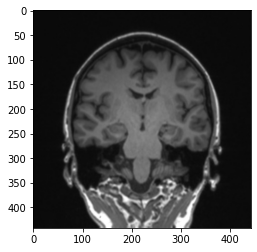

In [ ]:
img = "/content/Training/notumor/Tr-noTr_0004.jpg"
img = cv2.imread(img) # reads image
print("notumor Training Image: ")
plt.imshow(img);

After displaying these images, some of the features that can help distinguish the differences are the location, shape, and size since Pituitary tumors tend to be much smaller than others.

# **Image Augmentation**

Image Augmentation can be helpful because it extracts the objects of our interest for further processing such as description or recognition. It also gives more ways to explore the images in the dataset with different options like zooming in, resizing, gray scaling, and blurring.

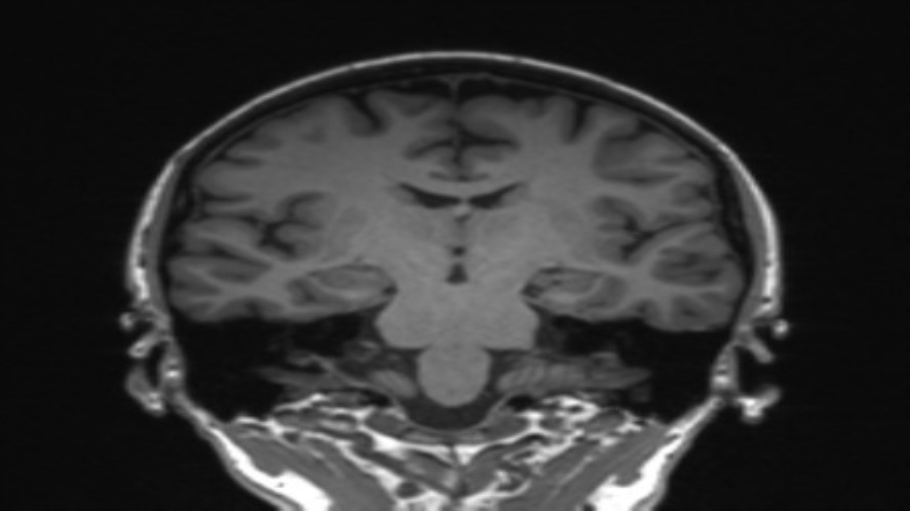

In [ ]:
# resizing to see the tumor better
small_img = cv2.resize(img,(455,256))
big_img = cv2.resize(img,(910,511))
cv2_imshow(big_img)

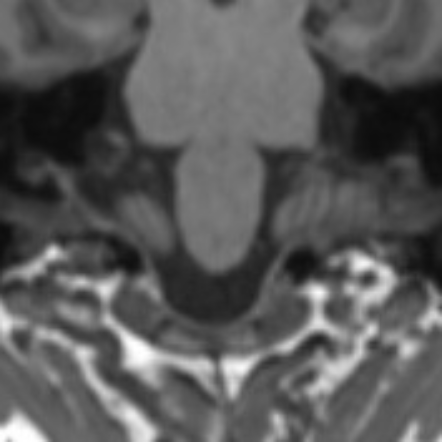

In [ ]:
# zooming in

zoom = 0.9

centerX,centerY=int(img.shape[0]*0.75),int(img.shape[1]/2)
radiusX,radiusY= int((1-zoom)*img.shape[0]*2),int((1-zoom)*img.shape[1]*2)

minX,maxX=centerX-radiusX,centerX+radiusX
minY,maxY=centerY-radiusY,centerY+radiusY

cropped = img[minX:maxX, minY:maxY]
zoom_img = cv2.resize(cropped, (img.shape[1], img.shape[0])) 
cv2_imshow(zoom_img)

In [ ]:
# converting to gray scale

gray_image = color.rgb2gray(img)


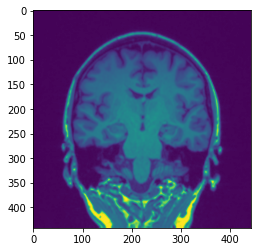

In [ ]:
plt.imshow(gray_image);

In [ ]:
print("Original Image Dimensions: ",img.shape)
print("Gray Image Dimensions: ",gray_image.shape)

Original Image Dimensions:  (442, 442, 3)
Gray Image Dimensions:  (442, 442)


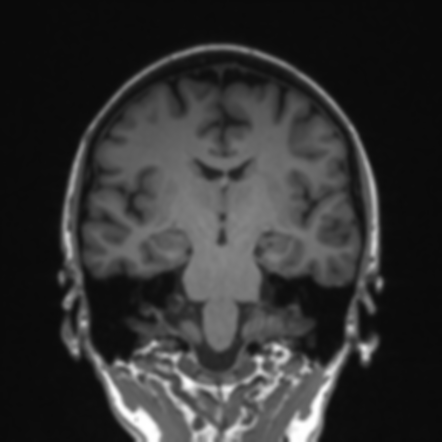

In [ ]:
# blurring image

blur_img = cv2.blur(img, (5,5))
cv2_imshow(blur_img)


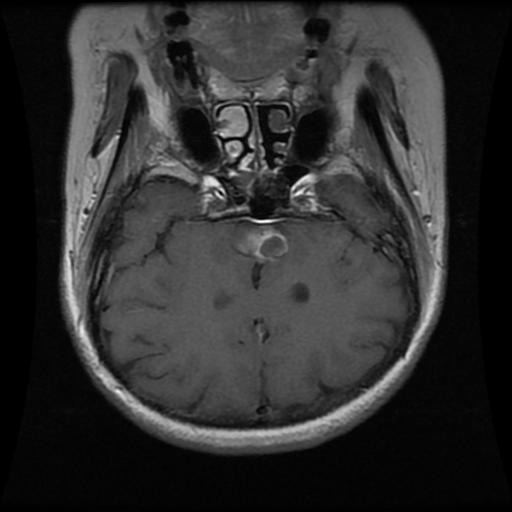

In [ ]:
# flipping image
img = cv2.imread('/content/Training/pituitary/Tr-piTr_0009.jpg')
img = cv2.flip(img, 0)
cv2_imshow(img)

# **Preparing Data for Model Development**

In [ ]:
# Storing file paths into variables
train_path = '/content/Training'
test_path = '/content/Testing'

In [ ]:
X = []
y = []
image_size = 150
for i in labels:
  folderpath = os.path.join(train_path, i)
  for j in tqdm(os.listdir(folderpath)):
    img = cv2.imread(os.path.join(folderpath, j))
    img = cv2.resize(img, (image_size, image_size))
    X.append(img)
    y.append(labels[i])

for i in labels:
  folderpath = os.path.join(test_path, i)
  for j in tqdm(os.listdir(folderpath)):
    img = cv2.imread(os.path.join(folderpath, j))
    img = cv2.resize(img, (image_size, image_size))
    X.append(img)
    y.append(labels[i])

X = np.array(X)
y = np.array(y)

100%|██████████| 300/300 [00:01<00:00, 202.54it/s]


Before this section, we looked at the shape of an image, in which the dimensions were (512,512,3). We changed the image size to 150 and now the new image size is (150,150,3). 

This is because it is faster to train models due to the reduced number of parameters.

In [ ]:
X = X.reshape(7023, 3*150*150)

In [ ]:
dir_path = X

In [ ]:
print(X.shape)
print(y.shape)

(7023, 67500)
(7023,)


In [ ]:
df = pd.DataFrame(np.c_[X,y])

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,67500
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[67500].value_counts()

1    2000
3    1757
2    1645
0    1621
Name: 67500, dtype: int64

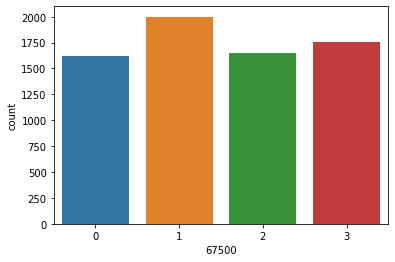

In [ ]:
sns.countplot(x=df[67500]);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape", X_train.shape)
print("X test shape",X_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test)

X_train shape (5618, 67500)
X test shape (1405, 67500)
y train shape (5618,)
y test shape [2 1 1 ... 2 1 1]


# **Building Models**
**The Classification Models that will be used are:**
- Logistic Regression
- Ridge Classifier
- Random Forest Classifier
- Decision Tree Classifier
- Support Vector Classifier
- K Neighbors Classifier
- Convolutional Neural Network
- Transfer Learning (AlexNet and MobileNet)
- Cross Validation Convolutional Neural Network

**After building these models, some of the different metrics that will be used to evaluate model performance will be:**
- Accuracy Score - (Number of Correct Predictions/Total Predictions)

- F1 score - 2*(precision**recall)/(precision+recall)

- Recall - True Positives / (True Positives + False Negatives)

- Precision - True Positives / (True Positives + False Positives)

- ROC/AUC score - False Positive Rate = False Positives/(False Positives+True Negatives), True Positive Rate = True Positives/(True Positives+False Negatives)

- Cohen Kappa Score - (Total accuracy – Random accuracy) / (1- Random accuracy).

True Positive - Prediction is no tumor, and there is no tumor.

True Negative - Prediction is a tumor, and there is a tumor.

False Positive - Prediction is tumor, but there is no tumor.

False Negative - Prediction is no tumor but there is a tumor.

These metrics all have a different way of evaluating the models predictions based on different factors such as data imbalance, the type of predictions being made, and the models ability to differentiate between each class. The goal is to aim for no false negative predictions.

In [ ]:
# Logistic Regression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

preds = lr_model.predict(X_test)

print("Logistic Regression Accuracy:",accuracy_score(y_test, preds))
print("Logistic Regression f1 score:",f1_score(y_test, preds, average='weighted'))
print("Logistic Regression Recall Score:",recall_score(y_test, preds, average='weighted'))
print("Logistic Regression Precision Score:",precision_score(y_test, preds, average='weighted'))
print("Logistic Regression Kappa score",cohen_kappa_score(y_test, preds))
# Accuracy:0.86
# f1 score: 0.86
# recall:0.86
# precision:0.86
# kappa score:0.81
#took 3m 14s to finish running

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Accuracy: 0.8284697508896797
Logistic Regression f1 score: 0.8263935501962233
Logistic Regression Recall Score: 0.8284697508896797
Logistic Regression Precision Score: 0.8251013314000638
Logistic Regression Kappa score 0.7706590103398342


In [ ]:
# Ridge Classifier

rc_model = RidgeClassifier()

rc_model.fit(X_train, y_train)

preds = rc_model.predict(X_test)

print("Ridge Classifier Accuracy:",accuracy_score(y_test, preds))
print("Ridge Classifier f1 score:",f1_score(y_test, preds, average='weighted'))
print("Ridge Classifier Recall Score:",recall_score(y_test, preds, average='weighted'))
print("Ridge Classifier Precision Score:",precision_score(y_test, preds, average='weighted'))
print("Ridge Classifier Kappa score",cohen_kappa_score(y_test, preds))
# Accuracy score: 0.79
# f1 score:0.79
# recall:0.79
# precision:0.79
# kappa score:0.72
# 1m 5s to finish running

Ridge Classifier Accuracy: 0.8213523131672598
Ridge Classifier f1 score: 0.8213523131672598
Ridge Classifier Recall Score: 0.8213523131672598
Ridge Classifier Precision Score: 0.8213523131672598
Ridge Classifier Kappa score 0.7611596107088918


In [ ]:
# Random Forest Classifier

rf_model = RandomForestClassifier(max_depth=5, random_state=0)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

print("RandomForest Accuracy:",accuracy_score(y_test, preds))
print("RandomForest f1 score:",f1_score(y_test, preds, average='weighted'))
print("RandomForest Recall Score:",recall_score(y_test, preds, average='weighted'))
print("RandomForest Precision Score:",precision_score(y_test, preds, average='weighted'))
print("RandomForest Kappa score",cohen_kappa_score(y_test, preds))
# Accuracy score: 0.84
# f1 score:0.84
# recall:0.84
# precision:0.84
# kappa score:0.79
# 20s to finish running

RandomForest Accuracy: 0.8391459074733096
RandomForest f1 score: 0.8391459074733095
RandomForest Recall Score: 0.8391459074733096
RandomForest Precision Score: 0.8391459074733096
RandomForest Kappa score 0.7849023142324312


In [ ]:
# Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(X_train, y_train)

preds = dt_model.predict(X_test)

print("Decision Tree Accuracy:",accuracy_score(y_test, preds))
print("Decision Tree f1 score:",f1_score(y_test, preds, average='weighted'))
print("Decision Tree Recall Score:",recall_score(y_test, preds, average='weighted'))
print("Decision Tree Precision Score:",precision_score(y_test, preds, average='weighted'))
print("Decision Tree Kappa score",cohen_kappa_score(y_test, preds))
# Accuracy:0.88
# f1 score:0.88
# recall:0.88
# precision:0.88
# kappa score:0.84
# 5m 25s to finish running

Decision Tree Accuracy: 0.8555160142348754
Decision Tree f1 score: 0.8555160142348756
Decision Tree Recall Score: 0.8555160142348754
Decision Tree Precision Score: 0.8555160142348754
Decision Tree Kappa score 0.8069823769019052


In [ ]:
# Support Vector Classifier

svc_model = svm.SVC()

svc_model.fit(X_train, y_train)

preds = svc_model.predict(X_test)

print("Support Vector Classifier Accuracy:",accuracy_score(y_test, preds))
print("Support Vector Classifier f1 score:",f1_score(y_test, preds, average='micro'))
print("Support Vector Classifier Recall Score:",recall_score(y_test, preds, average='micro'))
print("Support Vector Classifier Precision Score:",precision_score(y_test, preds, average='micro'))
print("Support Vector Classifier Kappa score",cohen_kappa_score(y_test, preds))
# Accuracy:0.89
# f1 score:0.89
# recall:0.89
# precision:0.89
# kappa score:
#25 minutes to finish running

Support Vector Classifier Accuracy: 0.8790035587188612
Support Vector Classifier f1 score: 0.8790035587188612
Support Vector Classifier Recall Score: 0.8790035587188612
Support Vector Classifier Precision Score: 0.8790035587188612
Support Vector Classifier Kappa score 0.8383353379255076


In [ ]:
# K Neighbors Classifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

preds = knn_model.predict(X_test)

print("KNeighborsClassifier Accuracy:",accuracy_score(y_test, preds))
print("KNeighborsClassifier f1 score:",f1_score(y_test, preds, average='weighted'))
print("KNeighborsClassifier Recall Score:",recall_score(y_test, preds, average='weighted'))
print("KNeighborsClassifier Precision Score:",precision_score(y_test, preds, average='weighted'))
print("KNeighborsCLassifier Kappa score",cohen_kappa_score(y_test, preds))
# accuracy:0.90
# f1 score:0.90
# recall:0.90
# precision:0.90
# kappa score:0.87
# 20s to finish running

KNeighborsClassifier Accuracy: 0.902491103202847
KNeighborsClassifier f1 score: 0.9001363988537239
KNeighborsClassifier Recall Score: 0.902491103202847
KNeighborsClassifier Precision Score: 0.9031848653285001
KNeighborsCLassifier Kappa score 0.8696004449511794


In [ ]:
X_train_reshaped = X_train.reshape(5618, 150,150,3)
X_test_reshaped = X_test.reshape(1405,150,150,3)
print("New X train shape:",X_train_reshaped.shape)
print("New X test shape:",X_test_reshaped.shape)

New X train shape: (5618, 150, 150, 3)
New X test shape: (1405, 150, 150, 3)


In [ ]:
# Convolutional Neural Network

cnn_model = Sequential()

cnn_model.add(Conv2D(32,(3,3), padding='same', input_shape=(image_size, image_size,3)))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3,3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(32, (3,3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3,3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(64, (3,3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, (3,3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(4))
cnn_model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-5)

cnn_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])

history = cnn_model.fit(X_train_reshaped, y_train,
                        validation_data=(X_test_reshaped, y_test),
                        epochs=30)

cnn_model.summary()

Epoch 1/30
176/176 [==============================] - 23s 74ms/step - loss: 2.0652 - accuracy: 0.5997 - val_loss: 0.6223 - val_accuracy: 0.7495
Epoch 2/30
176/176 [==============================] - 12s 67ms/step - loss: 0.5581 - accuracy: 0.7807 - val_loss: 0.4868 - val_accuracy: 0.8114
Epoch 3/30
176/176 [==============================] - 12s 68ms/step - loss: 0.4829 - accuracy: 0.8143 - val_loss: 0.4656 - val_accuracy: 0.8420
Epoch 4/30
176/176 [==============================] - 12s 69ms/step - loss: 0.3432 - accuracy: 0.8729 - val_loss: 0.3406 - val_accuracy: 0.8762
Epoch 5/30
176/176 [==============================] - 12s 69ms/step - loss: 0.2659 - accuracy: 0.9010 - val_loss: 0.2941 - val_accuracy: 0.8947
Epoch 6/30
176/176 [==============================] - 12s 69ms/step - loss: 0.2349 - accuracy: 0.9176 - val_loss: 0.2679 - val_accuracy: 0.9046
Epoch 7/30
176/176 [==============================] - 12s 69ms/step - loss: 0.1879 - accuracy: 0.9363 - val_loss: 0.2655 - val_accuracy:

Next, we will be trying out MobileNet and AlexNet, which are transfer learning models. They are different than a CNN and the other models because we use a pre-trained model as the starting point for a model on a new task. 

Look below to see what the architecture of AlexNet and MobileNet look like.

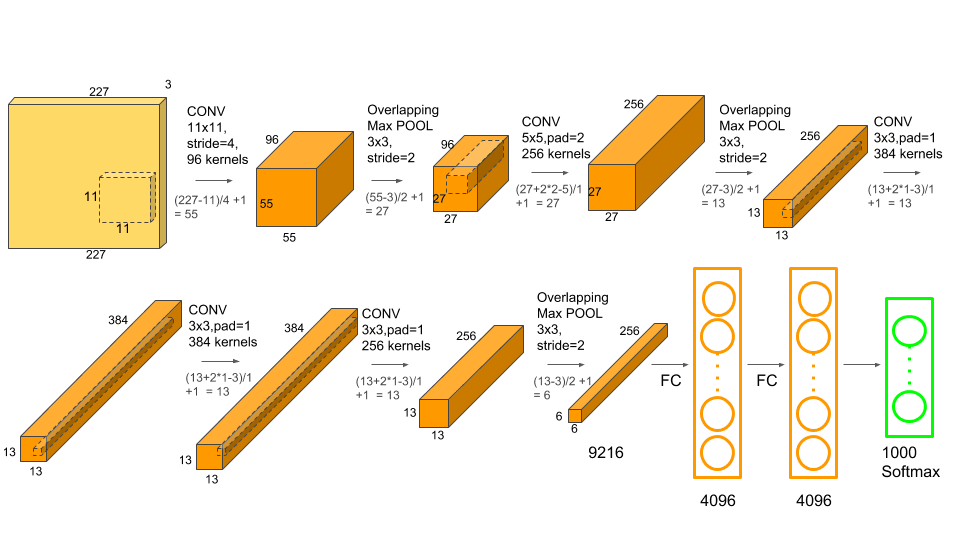

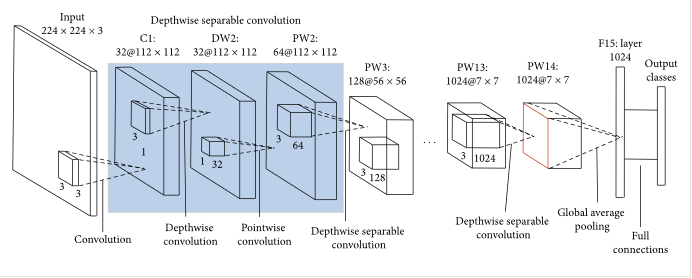

In [ ]:
# Mobilenet

mn_model = MobileNet(input_shape=(image_size,image_size,3), include_top=False, pooling='max')
tl_model = Sequential()
tl_model.add(mn_model)
tl_model.add(Dropout(0.2))
tl_model.add(Dense(512, activation='relu'))
tl_model.add(Dropout(0.2))
tl_model.add(Dense(4, activation="softmax"))

opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-5)


tl_model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])

history = tl_model.fit(X_train_reshaped, y_train,
                        validation_data=(X_test_reshaped, y_test),
                        epochs=30)

tl_model.summary()
# highest accuracy: 99.41, highest val accuracy: 98.01

17235968/17225924 [==============================] - 2s 0us/step
Epoch 1/30
176/176 [==============================] - 31s 94ms/step - loss: 0.7832 - accuracy: 0.8663 - val_loss: 0.1478 - val_accuracy: 0.9488
Epoch 2/30
176/176 [==============================] - 15s 86ms/step - loss: 0.1097 - accuracy: 0.9646 - val_loss: 0.1171 - val_accuracy: 0.9580
Epoch 3/30
176/176 [==============================] - 15s 87ms/step - loss: 0.0999 - accuracy: 0.9692 - val_loss: 0.2586 - val_accuracy: 0.9253
Epoch 4/30
176/176 [==============================] - 16s 88ms/step - loss: 0.1151 - accuracy: 0.9648 - val_loss: 0.2789 - val_accuracy: 0.9466
Epoch 5/30
176/176 [==============================] - 16s 89ms/step - loss: 0.0780 - accuracy: 0.9744 - val_loss: 0.1605 - val_accuracy: 0.9580
Epoch 6/30
176/176 [==============================] - 17s 99ms/step - loss: 0.0648 - accuracy: 0.9820 - val_loss: 0.2396 - val_accuracy: 0.9473
Epoch 7/30
176/176 [==============================] - 16s 92ms/step - l

In [ ]:
y_pred = tl_model.predict(X_test_reshaped)
print("MobileNet Recall:",recall_score(y_test.tolist(), y_pred.argmax(axis=1).tolist(), average='weighted'))
print("MobileNet Precision:",precision_score(y_test.tolist(), y_pred.argmax(axis=1).tolist(), average='weighted'))
print("MobileNet f1 score:",f1_score(y_test.tolist(), y_pred.argmax(axis=1).tolist(), average='weighted'))
print("MobileNet Kappa Score:",cohen_kappa_score(y_test.tolist(), y_pred.argmax(axis=1).tolist()))

MobileNet Recall: 0.9629893238434164
MobileNet Precision: 0.9640757560992124
MobileNet f1 score: 0.9626676191285796
MobileNet Kappa Score: 0.950495988725065


In [ ]:
# AlexNet

an_model = Sequential()

an_model.add(Conv2D(96, 11,strides = 4))
an_model.add(Activation('relu'))
an_model.add(Conv2D(256, 5))
an_model.add(Activation('relu'))
an_model.add(MaxPooling2D(2))
an_model.add(Conv2D(384, 3, padding='same'))
an_model.add(Activation('relu'))
an_model.add(Conv2D(256, 3, padding='same'))
an_model.add(Activation('relu'))
an_model.add(MaxPooling2D(2))
an_model.add(Activation('relu'))
an_model.add(Dropout(0.5))
an_model.add(Dense(4096))
an_model.add(Activation('relu'))
an_model.add(Dropout(0.3))
an_model.add(Dense(128))
an_model.add(Activation('relu'))
an_model.add(Flatten())
an_model.add(Dense(4))
an_model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-5)

an_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history = an_model.fit(X_train_reshaped.astype(np.float32), y_train.astype(np.float32), 
                    validation_data=(X_test_reshaped.astype(np.float32), y_test.astype(np.float32)),
                    epochs=30)

an_model.summary()

Epoch 1/30
176/176 [==============================] - 10s 46ms/step - loss: 1.5042 - accuracy: 0.5103 - val_loss: 0.7484 - val_accuracy: 0.7238
Epoch 2/30
176/176 [==============================] - 7s 38ms/step - loss: 0.7287 - accuracy: 0.7191 - val_loss: 0.5792 - val_accuracy: 0.7815
Epoch 3/30
176/176 [==============================] - 7s 38ms/step - loss: 0.5609 - accuracy: 0.7928 - val_loss: 0.5034 - val_accuracy: 0.8498
Epoch 4/30
176/176 [==============================] - 7s 39ms/step - loss: 0.4535 - accuracy: 0.8346 - val_loss: 0.4181 - val_accuracy: 0.8569
Epoch 5/30
176/176 [==============================] - 7s 38ms/step - loss: 0.3596 - accuracy: 0.8720 - val_loss: 0.4264 - val_accuracy: 0.8790
Epoch 6/30
176/176 [==============================] - 7s 38ms/step - loss: 0.3323 - accuracy: 0.8825 - val_loss: 0.3912 - val_accuracy: 0.8683
Epoch 7/30
176/176 [==============================] - 7s 38ms/step - loss: 0.2881 - accuracy: 0.8975 - val_loss: 0.3517 - val_accuracy: 0.866

# **Cross Validation**

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.

In this case, the same CNN model from before will be used but the inputs will be the new cross validation variables.

In [ ]:
# https://www.kaggle.com/code/franklemuchahary/basic-cnn-keras-with-cross-validation

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_train_reshaped, y_train, test_size=0.33, random_state=101)

In [ ]:
# Cross Val CNN

cv_cnn = Sequential()

cv_cnn.add(Conv2D(32,(3,3), padding='same', input_shape=(image_size, image_size,3)))
cv_cnn.add(Activation('relu'))
cv_cnn.add(Conv2D(32, (3,3), padding='same'))
cv_cnn.add(Activation('relu'))
cv_cnn.add(MaxPooling2D(pool_size=(2,2)))
cv_cnn.add(Conv2D(32, (3,3), padding='same'))
cv_cnn.add(Activation('relu'))
cv_cnn.add(Conv2D(32, (3,3), padding='same'))
cv_cnn.add(Activation('relu'))
cv_cnn.add(Conv2D(64, (3,3), padding='same'))
cv_cnn.add(Activation('relu'))
cv_cnn.add(MaxPooling2D(pool_size=(2,2)))
cv_cnn.add(Conv2D(64, (3,3), padding='same'))
cv_cnn.add(Activation('relu'))
cv_cnn.add(Dropout(0.2))
cv_cnn.add(Dense(512))
cv_cnn.add(Activation('relu'))
cv_cnn.add(MaxPooling2D(pool_size=(2,2)))
cv_cnn.add(Dropout(0.2))
cv_cnn.add(Flatten())
cv_cnn.add(Dense(4))
cv_cnn.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-5)

cv_cnn.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])

history = cv_cnn.fit(X_train_v, y_train_v,
                        validation_data=(X_test_v, y_test_v),
                        epochs=30)

cv_cnn.summary()

Epoch 1/30
118/118 [==============================] - 10s 74ms/step - loss: 1.8900 - accuracy: 0.5964 - val_loss: 0.7089 - val_accuracy: 0.7298
Epoch 2/30
118/118 [==============================] - 8s 71ms/step - loss: 0.5895 - accuracy: 0.7713 - val_loss: 0.7208 - val_accuracy: 0.7001
Epoch 3/30
118/118 [==============================] - 8s 71ms/step - loss: 0.4834 - accuracy: 0.8114 - val_loss: 0.5551 - val_accuracy: 0.7886
Epoch 4/30
118/118 [==============================] - 8s 72ms/step - loss: 0.3946 - accuracy: 0.8486 - val_loss: 0.4361 - val_accuracy: 0.8447
Epoch 5/30
118/118 [==============================] - 8s 71ms/step - loss: 0.2799 - accuracy: 0.8964 - val_loss: 0.5358 - val_accuracy: 0.7896
Epoch 6/30
118/118 [==============================] - 9s 76ms/step - loss: 0.2026 - accuracy: 0.9304 - val_loss: 0.3008 - val_accuracy: 0.8954
Epoch 7/30
118/118 [==============================] - 8s 72ms/step - loss: 0.1869 - accuracy: 0.9344 - val_loss: 0.3569 - val_accuracy: 0.860

Out of all these models, the MobileNet model performed best, with a validation accuracy **98.01**. This is because it significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets and it is a pre trained model.

# **Using Confusion Matrices to Evaluate the Models Further**

Confusion Matrices are used to determine classification models, and gives a better understanding of what the model is getting right and what errors it is making.

The different types of predictions can be either **True Positive, True Negative, False Positive, or False Negative**. What we hope to see, is no false negatives.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


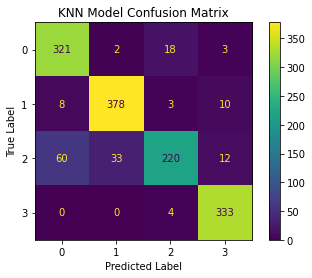

In [ ]:
# KNN CM
cm = plot_confusion_matrix(knn_model, X_test, y_test);
plt.title("KNN Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


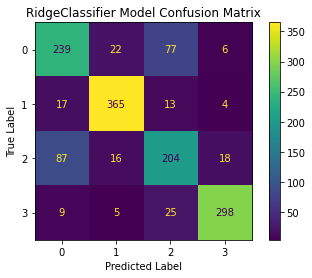

In [ ]:
# RidgeClassifier CM
cm = plot_confusion_matrix(rc_model, X_test, y_test)
plt.title("RidgeClassifier Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


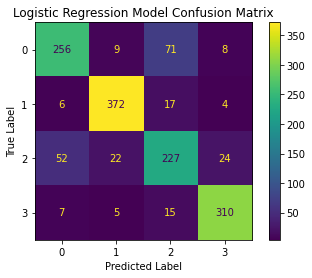

In [ ]:
# Logistic Regression CM
cm = plot_confusion_matrix(lr_model, X_test, y_test)
plt.title("Logistic Regression Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


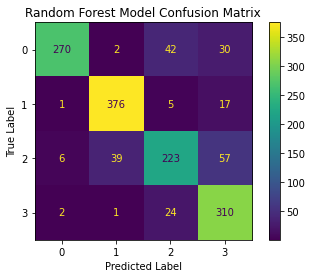

In [ ]:
# Random Forest CM
cm = plot_confusion_matrix(rf_model, X_test, y_test)
plt.title("Random Forest Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


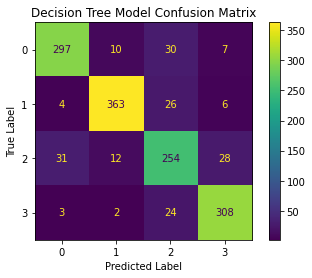

In [ ]:
# Decision Tree CM
cm = plot_confusion_matrix(dt_model, X_test, y_test)
plt.title("Decision Tree Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show(cm)

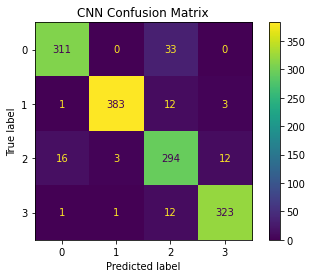

In [ ]:
# CNN CM

y_pred = cnn_model.predict(X_test_reshaped)
cm = confusion_matrix(y_test.tolist(), y_pred.argmax(axis=1).tolist())
disp = ConfusionMatrixDisplay(cm);
disp.plot()
plt.title("CNN Confusion Matrix")
plt.show()

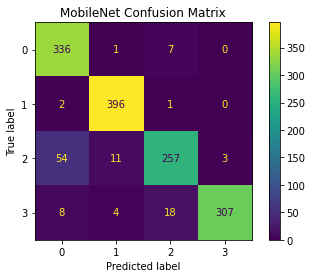

In [ ]:
# MobileNet CM
y_pred = tl_model.predict(X_test_reshaped)
cm = confusion_matrix(y_test.tolist(), y_pred.argmax(axis=1).tolist())
disp = disp = ConfusionMatrixDisplay(cm);
disp.plot()
plt.title("MobileNet Confusion Matrix")
plt.show()

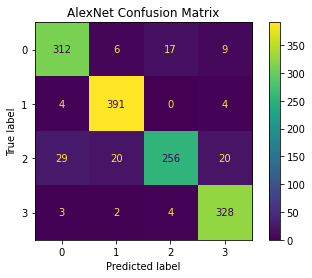

In [ ]:
# AlexNet CM
y_pred = an_model.predict(X_test_reshaped)
cm = confusion_matrix(y_test.tolist(), y_pred.argmax(axis=1).tolist())
disp = ConfusionMatrixDisplay(cm);
disp.plot()
plt.title("AlexNet Confusion Matrix")
plt.show()

# **ROC/AUC Scores**

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [ ]:
# Logistic Regression
y_preb_probs = lr_model.predict_proba(X_test)
print("Logistic Regression ROC/AUC score:",roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"))

Logistic Regression ROC/AUC score: 0.9574883415709063


In [ ]:
# Random Forest
y_preb_probs = rf_model.predict_proba(X_test)
print("RandomForest ROC/AUC score:",roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"))

RandomForest ROC/AUC score: 0.9658580565265535


In [ ]:
# Decision Tree
y_preb_probs = dt_model.predict_proba(X_test)
print("Decision Tree ROC/AUC score:",roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"))

Decision Tree ROC/AUC score: 0.9045764022959951


In [ ]:
# CNN
y_preb_probs = cnn_model.predict(X_test_reshaped)
print("CNN ROC/AUC score:",roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"))

CNN ROC/AUC score: 0.9938034466754699


In [ ]:
# Support Vector Classifier
y_preb_probs = svc_model.predict_proba(X_test)
print("Support Vector Classifier ROC/AUC score:",roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"))

In [ ]:
# KNN 
y_preb_probs = knn_model.predict_proba(X_test)
print("KNN ROC/AUC score:",roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"))

KNN ROC/AUC score: 0.9737284966119504


In [ ]:
# MobileNet

y_preb_probs = tl_model.predict(X_test_reshaped)
print("MobileNet ROC/AUC Score:",roc_auc_score(y_test, y_preb_probs, average='weighted', multi_class="ovr"))

MobileNet ROC/AUC Score: 0.9968657999808662


In [ ]:
# AlexNet

y_preb_probs = an_model.predict(X_test_reshaped)
print("AlexNet ROC/AUC Score:",roc_auc_score(y_test, y_preb_probs, average='weighted', multi_class="ovr"))

AlexNet ROC/AUC Score: 0.9832323594440566


In [ ]:
# Cross Validation CNN 
y_preb_probs = cv_cnn.predict(X_test_v)
print("Cross Val CNN ROC/AUC Score:",roc_auc_score(y_test_v, y_preb_probs, average='weighted', multi_class="ovr"))

Cross Val CNN ROC/AUC Score: 0.9855249039607442


# **Building a Web App📲**

It's now time to deploy the MobileNet model to a web app using Streamlit. Streamlit is a fast way to create web apps for maching learning models with Python.

We'll also be using Ngrok, which will allow us to actually access the website that we have created.

The webapp will allow users to upload an image of a Brain MRI and receive a prediction classifiying what the tumor is.

Some of the problems that we could see were there were some classes that were predicted wrong such as meningioma and glioma which could be something that we could see if a glioma or meningioma image is uploaded.


In [ ]:
!pip -q install streamlit > /dev/null
!pip -q install pyngrok > /dev/null
import streamlit as st
from joblib import dump
from pyngrok import ngrok

In [ ]:
# save model
dump(tl_model, "model.joblib")

2022-09-05 04:48:23.001 WARNING absl: Function `_wrapped_model` contains input name(s) mobilenet_1.00_224_input with unsupported characters which will be renamed to mobilenet_1_00_224_input in the SavedModel.
INFO:tensorflow:Assets written to: ram://5ba3b38e-a353-44b6-900c-122e2d49ff0e/assets
2022-09-05 04:48:31.750 INFO    tensorflow: Assets written to: ram://5ba3b38e-a353-44b6-900c-122e2d49ff0e/assets


['model.joblib']

In [ ]:
# authtoken allows website tunnel to be made
!ngrok authtoken 2Ar1FX8pP8Fq9iTqMgKYnvBV3E8_3nSfNVyGFjs5Cx4p62RZM

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# This is where we can edit anything on the website

%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import plotly.express as px
from joblib import load
import time

model = load("model.joblib")
Tumors = ['Glioma','Notumor','Meningioma','Pituitary']
st.title('Brain Tumor Classification')
st.write("Insert your Brain Tumor MRI Image below, and see if the model can predict it correctly.")
st.write("This model has only been trained and tested on the following classes; Glioma, Notumor, Meningioma, and Pituitary")
upload_img = st.file_uploader("Upload Image Here")

if upload_img is not None: 
  file_bytes = np.asarray(bytearray(upload_img.read()), dtype=np.uint8)
  image = cv2.imdecode(file_bytes, 1)
  st.image(image, channels="RGB")
  resized = cv2.resize(image, (150, 150), interpolation=cv2.INTER_LANCZOS4)
  img = np.array(resized)
  img = img.reshape(1, 150, 150, 3) 
  scores = model.predict(img)
  print("")
  bar = st.progress(0)
  for percent_complete in range(100):
    time.sleep(0.1)
    bar.progress(percent_complete + 1)
  st.write(f"The predicted tumor is: {Tumors[scores.argmax()]}")
  df = pd.DataFrame()
  df["Tumors"] = Tumors
  df["Scores"] = scores.flatten()
  px.bar(df, x='Tumors', y='Scores', title="Model scores for each class")

Overwriting app.py


In [ ]:
# Starts website server
public_url = ngrok.connect(port='80')
print (public_url)
!streamlit run --server.port 80 app.py >/dev/null

INFO:pyngrok.ngrok:Opening tunnel named: http-80-cac5eb53-52c9-456d-a353-71eea591d0b2
2022-09-05 05:18:05.620 INFO    pyngrok.ngrok: Opening tunnel named: http-80-cac5eb53-52c9-456d-a353-71eea591d0b2
INFO:pyngrok.process.ngrok:t=2022-09-05T05:18:05+0000 lvl=info msg="no configuration paths supplied"
2022-09-05 05:18:05.708 INFO    pyngrok.process.ngrok: t=2022-09-05T05:18:05+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2022-09-05T05:18:05+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2022-09-05 05:18:05.715 INFO    pyngrok.process.ngrok: t=2022-09-05T05:18:05+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2022-09-05T05:18:05+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2022-09-05 05:18:05.725 INFO    pyngrok.process.ngrok: t=2022-09-05T05:18:05+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngro

NgrokTunnel: "http://0448-35-198-230-233.ngrok.io" -> "http://localhost:80"
2022-09-05 05:18:07.772 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


INFO:pyngrok.process.ngrok:t=2022-09-05T05:18:11+0000 lvl=info msg="join connections" obj=join id=42e671f432df l=127.0.0.1:80 r=74.102.63.141:64074
2022-09-05 05:18:11.482 INFO    pyngrok.process.ngrok: t=2022-09-05T05:18:11+0000 lvl=info msg="join connections" obj=join id=42e671f432df l=127.0.0.1:80 r=74.102.63.141:64074
INFO:pyngrok.process.ngrok:t=2022-09-05T05:18:11+0000 lvl=info msg="join connections" obj=join id=760f13ff5185 l=127.0.0.1:80 r=74.102.63.141:64075
2022-09-05 05:18:11.771 INFO    pyngrok.process.ngrok: t=2022-09-05T05:18:11+0000 lvl=info msg="join connections" obj=join id=760f13ff5185 l=127.0.0.1:80 r=74.102.63.141:64075
INFO:pyngrok.process.ngrok:t=2022-09-05T05:18:11+0000 lvl=info msg="join connections" obj=join id=e2b868d8596b l=127.0.0.1:80 r=74.102.63.141:64083
2022-09-05 05:18:11.800 INFO    pyngrok.process.ngrok: t=2022-09-05T05:18:11+0000 lvl=info msg="join connections" obj=join id=e2b868d8596b l=127.0.0.1:80 r=74.102.63.141:64083
INFO:pyngrok.process.ngrok:t

2022-09-05 05:18:19.772715: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


INFO:pyngrok.process.ngrok:t=2022-09-05T05:18:25+0000 lvl=info msg="join connections" obj=join id=124b5f162e90 l=127.0.0.1:80 r=74.102.63.141:64086
2022-09-05 05:18:25.772 INFO    pyngrok.process.ngrok: t=2022-09-05T05:18:25+0000 lvl=info msg="join connections" obj=join id=124b5f162e90 l=127.0.0.1:80 r=74.102.63.141:64086
INFO:pyngrok.process.ngrok:t=2022-09-05T05:19:36+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"
2022-09-05 05:19:36.953 INFO    pyngrok.process.ngrok: t=2022-09-05T05:19:36+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"
INFO:pyngrok.process.ngrok:t=2022-09-05T05:19:36+0000 lvl=info msg="session closing" obj=tunnels.session err=nil
2022-09-05 05:19:36.963 INFO    pyngrok.process.ngrok: t=2022-09-05T05:19:36+0000 lvl=info msg="session closing" obj=tunnels.session err=nil


# **End of Notebook📙**

This dataset is sourced from: Msoud Nickparvar. (2021). <i>Brain Tumor MRI Dataset</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/2645886